In this notebook, we calculate the "true" mutual information for a set of synthetic datasets. We use Monte Carlo integration with a large number of samples to estimate the MI integral (unless an analytic version is available), and save the results.

### Import packages

In [16]:
import os
import numpy as np
from gmm_mi.gmm import GMMWithMI as GMM
import gmm_mi.data.synthetic_data as synthetic_data
from gmm_mi.utils import analytic_MI

### Iterate over the datasets and store the results

In [2]:
MI_method = 'MC'
MC_samples = 1e8
dataset_names = []
MI_values = []

In [3]:
for d_name, obj in synthetic_data.__dict__.items(): # iterate through every module's attributes
    if isinstance(obj, GMM):
        dataset_names.append(d_name)
        # if 1D, calculate using analytic formula for MI
        if len(obj.weights_init) == 1:
            MI_value = analytic_MI.calculate_MI_D1_analytical(obj.covariances_init[0])
            MI_values.append(MI_value)
            continue
        if MI_method == 'MC':
            MI_value = obj.estimate_MI_MC(MC_samples=MC_samples)
        elif MI_method == 'quad':
            MI_value = obj.estimate_MI_quad()
        MI_values.append(MI_value)

### Save the MI values

In [4]:
root_folder = './MI_synthetic_datasets'
if not os.path.isdir(root_folder):
    os.mkdir(root_folder)
    
for i, MI_value in enumerate(MI_values):
    np.save(f"{root_folder}/MI_{dataset_names[i]}", MI_value)

In [8]:
import numpy as np
label = 'D3_rhoneq0'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')

N_values = [1000, 2000, 5000, 10000, 20000, 50000]

for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    #if N >= 10000:
        #MI_file = MI_file[:109]
        #print(len(MI_file[MI_file[:, 0] < 0.1, 0]))
        #MI_file[MI_file[:, 0] < 0.1, 0] = analytic
    
    #print((np.mean(MI_file[:, 0] - analytic) / analytic))
    #print((np.mean(MI_file[:, 1])))
    
    print(np.mean( (MI_file[:, 0] - analytic) / MI_file[:, 1]))

0.5329727997471472
0.35115815077485807
0.3705813448903728
0.2927555248413233
0.15831439374525333
0.20065533733557883


In [54]:
MI_file

array([[0.16766477, 0.00206629],
       [0.16553108, 0.00205283],
       [0.16827127, 0.00216992],
       [0.17048123, 0.00226497],
       [0.17139684, 0.00192763],
       [0.16843618, 0.00210996],
       [0.16972631, 0.00219526],
       [0.16855303, 0.00206477],
       [0.16498353, 0.00182558],
       [0.16385811, 0.00213839],
       [0.17155771, 0.00218011],
       [0.17028761, 0.00222944],
       [0.1697865 , 0.00208097],
       [0.17248009, 0.00213248],
       [0.16822015, 0.00210024],
       [0.17156293, 0.00208151],
       [0.16883858, 0.00224315],
       [0.17091591, 0.00225011],
       [0.16786306, 0.00225258],
       [0.1653996 , 0.00203634],
       [0.17136842, 0.00212422],
       [0.16675541, 0.00225502],
       [0.16649969, 0.00206906],
       [0.17139805, 0.0022761 ],
       [0.16700596, 0.00207874],
       [0.16914311, 0.00216963],
       [0.1678291 , 0.00222009],
       [0.16864597, 0.00210903],
       [0.16806084, 0.00214374],
       [0.17156542, 0.0018798 ],
       [0.

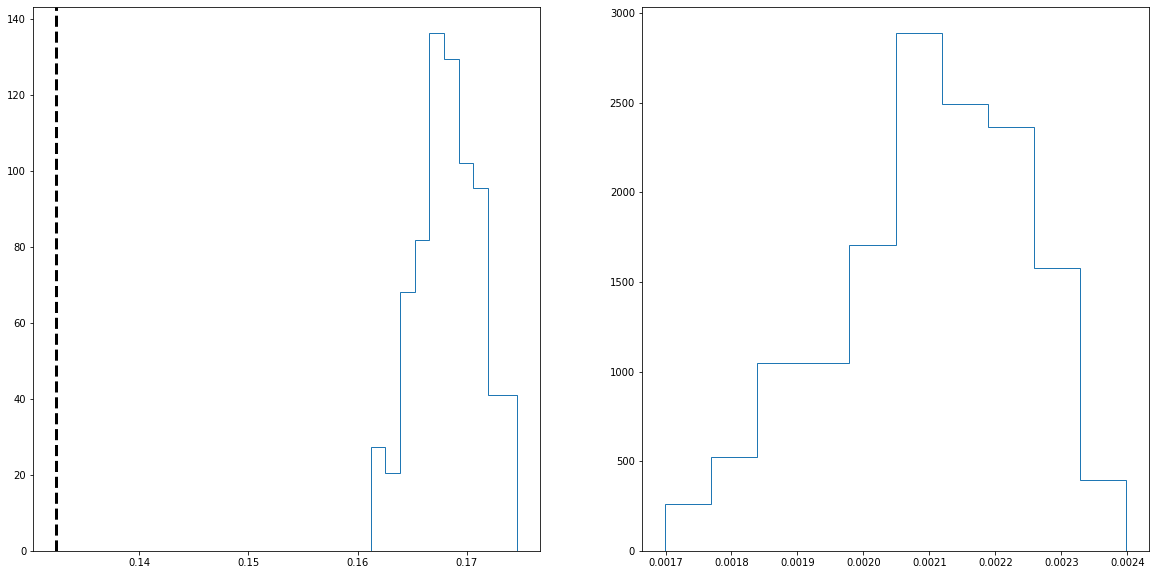

In [70]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], density=True, histtype='step')
ax1.axvline(0.13237903, linewidth=3, c='k', linestyle='--')
ax2.hist(MI_file[:, 1], density=True, histtype='step');